**Este notebook muestra el proceso clustering y etiquetado de los vehículos en cada frame de la secuencia.**

1. Clustering 
2. Bounding boxes
3. Bounding boxes con etiquetado
---

In [1]:
import pandas as pd
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## **CLUSTERING**

c:\Users\aleja\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\aleja\anaconda3\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


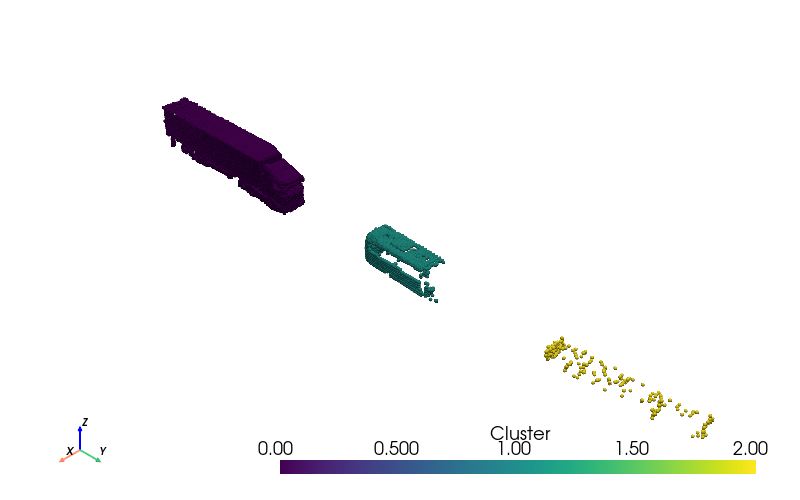

In [4]:
csv = pd.read_csv('limpio_pointcloud_1727346194_38163395.csv')
data_frame = pd.DataFrame(csv)

X = data_frame['x']
Y = data_frame['y']
Z = data_frame['z']

points = np.column_stack((Y, X, Z))  # combinación buena

scaler = StandardScaler()
points_scaled = scaler.fit_transform(points)

db = DBSCAN(eps=0.6, min_samples=20).fit(points_scaled)
labels = db.labels_

cloud = pv.PolyData(points)
cloud.point_data['Cluster'] = labels

plotter = pv.Plotter(window_size=[800, 500])
plotter.add_mesh(cloud, render_points_as_spheres=True, point_size=4, scalars='Cluster', cmap='viridis')

plotter.show_axes()
plotter.camera.zoom(1.5)

plotter.show()

## **BOUNDING BOX**

c:\Users\aleja\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\aleja\anaconda3\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


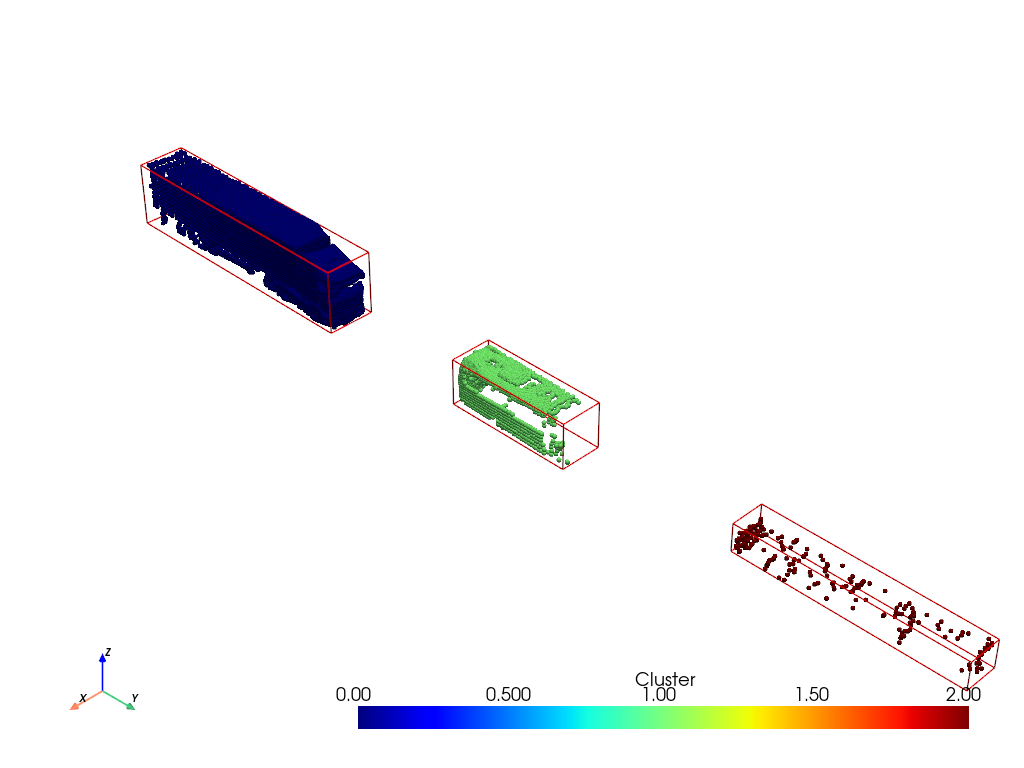

In [7]:
points = np.column_stack((Y, X, Z))  # combinación buena
scaler = StandardScaler()
points_scaled = scaler.fit_transform(points)

db = DBSCAN(eps=0.6, min_samples=20).fit(points_scaled)
labels = db.labels_

plotter = pv.Plotter()
cloud = pv.PolyData(points)
cloud.point_data['Cluster'] = labels
plotter.add_mesh(cloud, render_points_as_spheres=True, point_size=5, scalars='Cluster', cmap='jet')

bounding_boxes = []
colors = []

unique_labels = np.unique(labels[labels != -1])  # Excluir ruido
colors_list = plt.get_cmap('jet', len(unique_labels))

for label in unique_labels:
    cluster_points = points[labels == label]

    # Almacenar el color correspondiente al clúster
    color = colors_list(label)  # Obtén el color del colormap
    colors.append(color[:3])  # Solo obtener RGB

    min_x, min_y, min_z = np.min(cluster_points, axis=0)
    max_x, max_y, max_z = np.max(cluster_points, axis=0)
    
    bounding_boxes.append((min_x, max_x, min_y, max_y, min_z, max_z))

for bbox in bounding_boxes:
    min_x, max_x, min_y, max_y, min_z, max_z = bbox
    box = pv.Cube(bounds=(min_x, max_x, min_y, max_y, min_z, max_z))
    plotter.add_mesh(box, color='red', style='wireframe', line_width=1.5)

plotter.show_axes()
plotter.camera.zoom(1.5)

plotter.show()

## **ETIQUETAS**

c:\Users\aleja\anaconda3\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\aleja\anaconda3\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


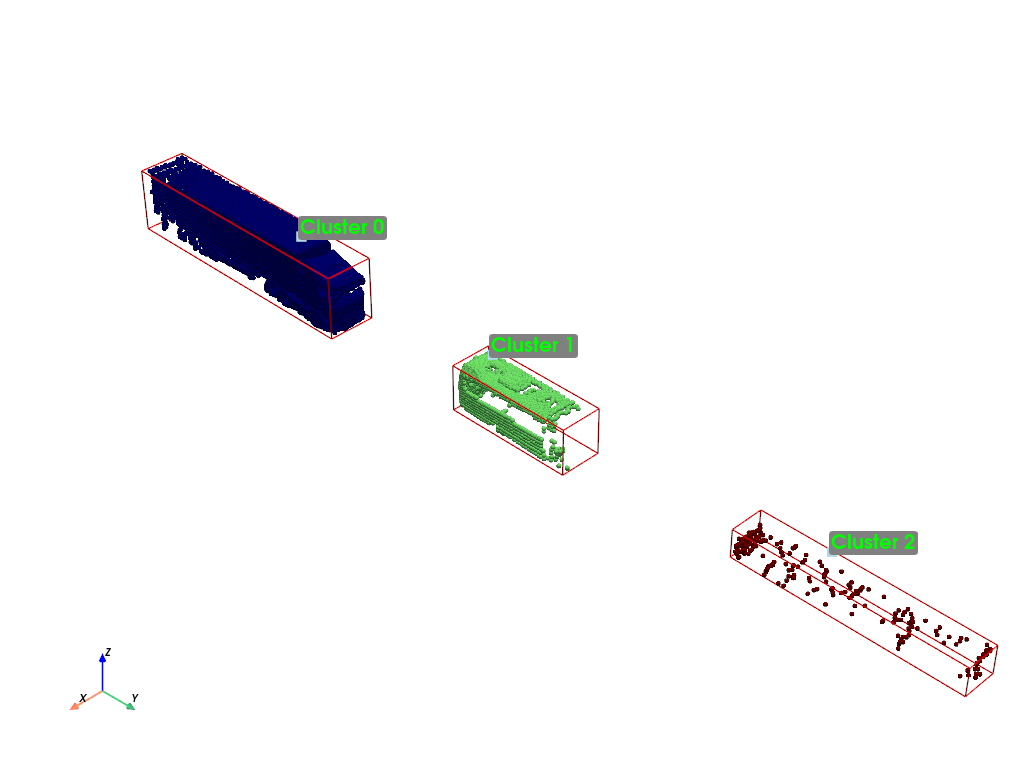

In [10]:
points = np.column_stack((Y, X, Z))  # combinación buena
scaler = StandardScaler()
points_scaled = scaler.fit_transform(points)

db = DBSCAN(eps=0.6, min_samples=20).fit(points_scaled)
labels = db.labels_

plotter = pv.Plotter(window_size=[800, 500])
plotter = pv.Plotter()
cloud = pv.PolyData(points)
cloud.point_data['Cluster'] = labels
plotter.add_mesh(cloud, render_points_as_spheres=True, point_size=5, scalars='Cluster', cmap='jet', show_scalar_bar=False)

bounding_boxes = []
centroides = []
colors = []

unique_labels = np.unique(labels[labels != -1])  # Excluir ruido
colors_list = plt.get_cmap('jet', len(unique_labels))

for label in unique_labels:
    cluster_points = points[labels == label]

    centroide = np.mean(cluster_points, axis=0)
    centroides.append(centroide)

    # Almacenar el color correspondiente al clúster
    color = colors_list(label)  # Obtén el color del colormap
    colors.append(color[:3])  # Solo obtener RGB

    min_x, min_y, min_z = np.min(cluster_points, axis=0)
    max_x, max_y, max_z = np.max(cluster_points, axis=0)
    
    bounding_boxes.append((min_x, max_x, min_y, max_y, min_z, max_z))

for bbox in bounding_boxes:
    min_x, max_x, min_y, max_y, min_z, max_z = bbox
    box = pv.Cube(bounds=(min_x, max_x, min_y, max_y, min_z, max_z))
    plotter.add_mesh(box, color='red', style='wireframe', line_width=1.5)

colors = np.array(colors)

for i, (centroide, color) in enumerate(zip(centroides, colors)):
    centroide[2] += 2 # mover etiqueta más arriba

    plotter.add_point_labels(centroide, [f"Cluster {i}"], point_size=10, font_size=20, text_color="lime")

plotter.show_axes()
plotter.camera.zoom(1.5)

plotter.show()

---

---

---

## (**ORDENAR POR NOMBRE LOS CSV**)

In [27]:
def ordenar_cifras_csv(archivo: str):
    partes = archivo.split('_')
    primera_cifra = int(partes[1])
    segunda_cifra = int(partes[2].split('.')[0])  
    return (primera_cifra, segunda_cifra)

archivos = [archivo for archivo in os.listdir("pointclouds")]
archivos_ordenados = sorted(archivos, key=ordenar_cifras_csv)
# ---------------------------------------------------------------
for indice, archivo in enumerate(archivos_ordenados):
    print(indice, archivo)
    break

0 pointcloud_1727346186_488981170.csv


## (**ORDENAR POR NOMBRE LAS PNG**)

In [ ]:
def ordenar_cifras_png(archivo: str):
    partes = archivo.split('_')
    primera_cifra = int(partes[0])
    segunda_cifra = int(partes[1].split('.')[0])  
    return (primera_cifra, segunda_cifra)

archivos = [archivo for archivo in os.listdir("cluster_images")]
archivos_ordenados = sorted(archivos, key=ordenar_cifras_png)

archivos_ordenados

In [31]:
for archivo in os.listdir('cluster_images'):
    # partes = archivo.removesuffix('.png').split('_')
    # os.rename(f'cluster_images/{archivo}', f'cluster_images/{partes[1]}_{partes[2]}_{partes[0]}.png')
    break